# Exploratory Data Analysis (EDA): Test 1 data

At the end of the test-to-failure experiment, inner race defect occurred in **bearing 3** and roller element defect in **bearing 4**.

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
%matplotlib inline

In [2]:
# Import functions to read and sample data
from Read_and_Sample_Data import read_dataset
from Read_and_Sample_Data import down_sample

metadata = pd.read_csv('metadata.csv')

In [3]:
# Import functions to extract frequency and time features from the data
from Data_Transforms import FFT
from Data_Transforms import time_features

In [4]:
test_1 = read_dataset(data_dir= metadata['dir'][0], 
                      first_ts= pd.to_datetime(metadata['start_ts'][0]),
                      colnames= eval(metadata['colnames'][0]),
                      rate=20480)

100%|██████████████████████████████████████████████████████████████████████████████| 2156/2156 [01:01<00:00, 34.84it/s]


In [5]:
test_1.head()

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y,time,measurement_id,counter
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142,0.000000,0,0
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122,0.000049,0,1
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071,0.000098,0,2
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078,0.000146,0,3
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066,0.000195,0,4


### View data

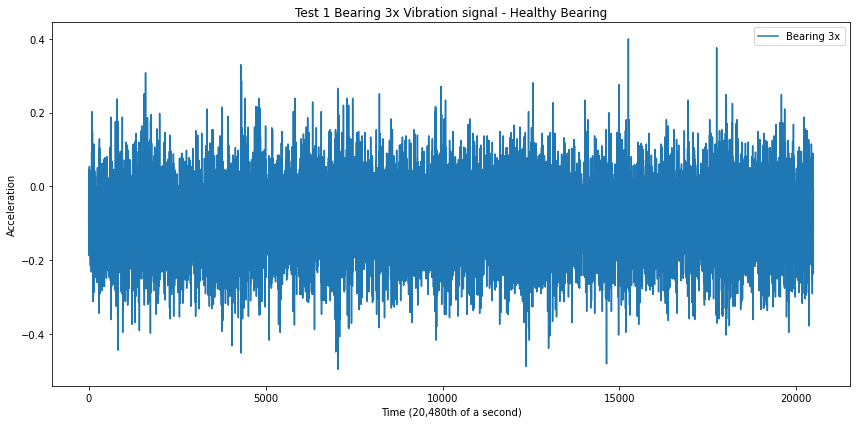

In [6]:
# Plot first measurement period
plt.figure(figsize=(12,6))
plt.plot(test_1[test_1['measurement_id']==0].iloc[:,4:5], label='Bearing 3x')
plt.ylabel("Acceleration")
plt.xlabel("Time (20,480th of a second)")
plt.title("Test 1 Bearing 3x Vibration signal - Healthy Bearing")
plt.tight_layout()
plt.legend()
plt.show()

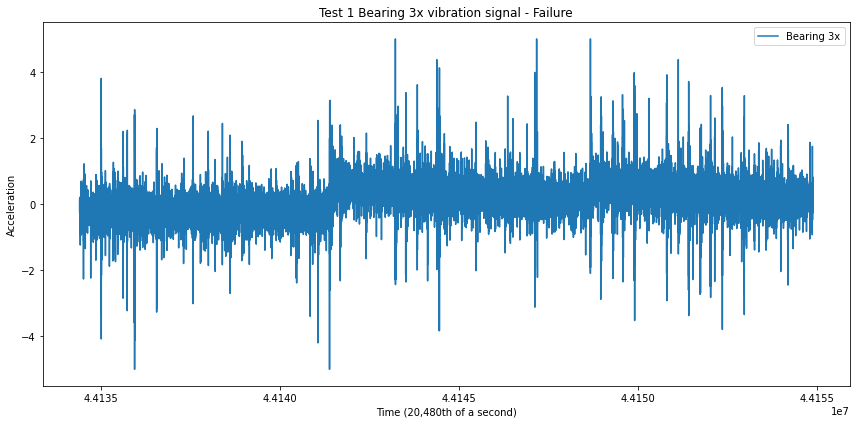

In [7]:
# Plot last measurement period
plt.figure(figsize=(12,6))
plt.plot(test_1[test_1['measurement_id']==2155].iloc[:,4:5], label='Bearing 3x')
plt.ylabel("Acceleration")
plt.xlabel("Time (20,480th of a second)")
plt.title("Test 1 Bearing 3x vibration signal - Failure")
plt.tight_layout()
plt.legend()
plt.show()

### Down-sample for charting

In [8]:
# Apply down-sampling prior to analysis
df = pd.DataFrame()
for col in eval(metadata['colnames'][0])[0:8]:
    arr = down_sample(test_1, col, 100)
    df[col] = arr
df.head()

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y
0,-0.051831,-0.046597,-0.049863,-0.050340,-0.046417,-0.043678,-0.055040,-0.051397
1,-0.110954,-0.117484,-0.104311,-0.108092,-0.103640,-0.107929,-0.113724,-0.116336
2,-0.090300,-0.099561,-0.099432,-0.090107,-0.101677,-0.108059,-0.091735,-0.097271
3,-0.099884,-0.096647,-0.101568,-0.099800,-0.093481,-0.094519,-0.097295,-0.104210
4,-0.100917,-0.097963,-0.090295,-0.101066,-0.079809,-0.094893,-0.098775,-0.095282


In [9]:
df.shape

(441549, 8)

### Plot raw signal

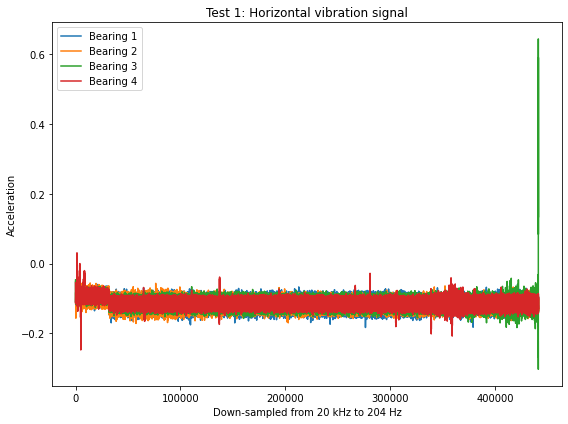

In [10]:
# Plot raw horizontal vibration signal: Test 1
plt.figure(figsize=(8,6))
plt.plot(df['b1x'], label='Bearing 1')
plt.plot(df['b2x'], label='Bearing 2')
plt.plot(df['b3x'], label='Bearing 3')
plt.plot(df['b4x'], label='Bearing 4')
plt.ylabel("Acceleration")
plt.xlabel("Down-sampled from 20 kHz to 204 Hz")
plt.title("Test 1: Horizontal vibration signal")
plt.tight_layout()
plt.legend()
plt.show()

### Absolute Mean Signal

In [11]:
b1x_means = test_1.apply(abs).groupby(['measurement_id']).mean()

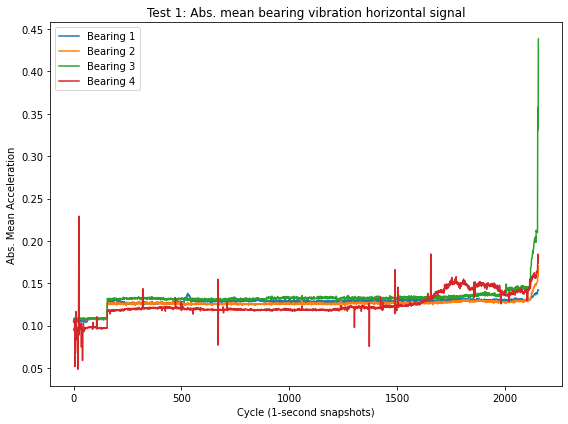

In [12]:
plt.figure(figsize=(8,6))
plt.plot(b1x_means['b1x'], label='Bearing 1')
plt.plot(b1x_means['b2x'], label='Bearing 2')
plt.plot(b1x_means['b3x'], label='Bearing 3')
plt.plot(b1x_means['b4x'], label='Bearing 4')
plt.ylabel("Abs. Mean Acceleration")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1: Abs. mean bearing vibration horizontal signal")
plt.tight_layout()
plt.legend()
plt.show()

Visual inspection identifies **discontinuity in acceleration the early stage of the Test 1 signal data**. (Cycles 1 to ~200?). This may be due to measurement error or some change in the experimental approach. The first segment of Test 1 data will be excluded.

### Identify discontinuity in the data

In [13]:
b1x_means.iloc[150:160, :]

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y,time,counter
measurement_id,,,,,,,,,,
150,0.108779,0.103617,0.108565,0.102298,0.109409,0.111731,0.096876,0.099204,76669.499976,10239.5
151,0.108105,0.102814,0.108073,0.102473,0.108387,0.111665,0.096771,0.098701,77269.499976,10239.5
152,0.108288,0.102951,0.108570,0.102991,0.109087,0.110583,0.097339,0.098939,77869.499976,10239.5
153,0.107215,0.102693,0.108719,0.102365,0.108682,0.111870,0.097456,0.099187,78469.499976,10239.5
154,0.107396,0.102502,0.107828,0.102592,0.108294,0.110262,0.097691,0.098326,79069.499976,10239.5
155,0.107804,0.102896,0.108125,0.102383,0.108105,0.111067,0.096891,0.175733,79669.499976,10239.5
156,0.126928,0.124055,0.125731,0.121336,0.131791,0.133211,0.117528,0.118959,614002.499976,10239.5
157,0.126741,0.124496,0.125811,0.121749,0.130960,0.132099,0.117121,0.118855,614602.499976,10239.5
158,0.126920,0.125463,0.126077,0.121909,0.132049,0.132759,0.117761,0.119592,615202.499976,10239.5


Change occurs at **measurement ID 156!**

### RMS
"We know from Qiu et al that the RMS value of the accelerometer should be a good indicator that something related to the bearing is failing. Let's try to plot the RMS aggregated per 1s snapshot over the entire span of Set No 1.

If the mean is zero, RMS is the same as standard deviation, as seen from their definitions below. Our mean might not be exactly zero, but close enough."

**Source:** https://www.kaggle.com/code/andersgb/nasa-bearing-dataset-outlier-detection

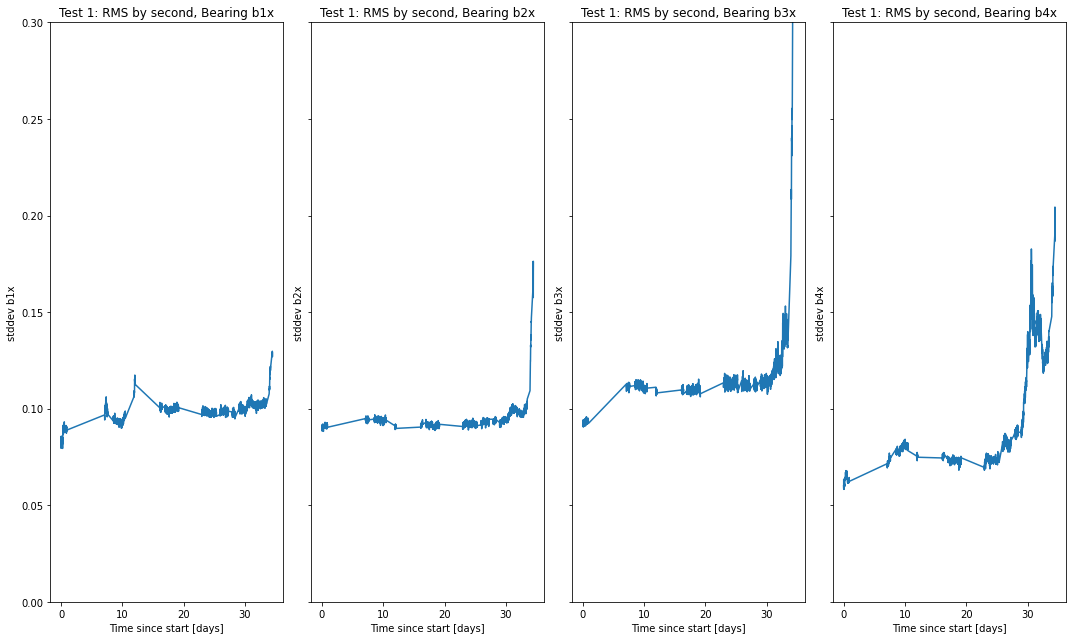

In [14]:
# Source: https://www.kaggle.com/code/andersgb/nasa-bearing-dataset-outlier-detection
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15, 9))
x = test_1.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["b1x", "b2x", "b3x", "b4x"], axes.ravel()):
    y = test_1.groupby("measurement_id")[sensor].std(ddof=0)
    ax.set_ylim([0, 0.3])
    ax.plot(x, y)
    ax.set_ylabel(f"stddev {sensor}")
    ax.set_xlabel("Time since start [days]")
    ax.title.set_text(f"Test 1: RMS by second, Bearing {sensor}")
plt.tight_layout()
plt.show()

### Kurtosis

From "Estimation of Remaining Useful Life of Ball Bearings using Data Driven Methodologies" paper (https://ieeexplore.ieee.org/document/6299548). 

Sutrisno, Oh, et. al., found a high correlation between the moving average of kurtosis and time -- a strong monotonic relationship, indicating that kurtosis is a good feature for prognostics.

In [15]:
os.getcwd()

'C:\\Users\\nadav.rindler\\OneDrive - American Red Cross\\Training\\GTxOMSA\\Practicum'

In [16]:
df = pd.DataFrame()
for file in ['ts_b1x','ts_b2x','ts_b3x','ts_b4x']:
    temp = pd.read_csv('Data/IMS/TS/' + file + '_ds10.csv')
    temp['bearing'] = file
    df = pd.concat([df, temp], axis=0, ignore_index=True)

In [17]:
b1x_kurt = df[df['bearing']=='ts_b1x']['ktosis']
b2x_kurt = df[df['bearing']=='ts_b2x']['ktosis'].reset_index(drop=True)
b3x_kurt = df[df['bearing']=='ts_b3x']['ktosis'].reset_index(drop=True)
b4x_kurt = df[df['bearing']=='ts_b4x']['ktosis'].reset_index(drop=True)

In [18]:
kurt = pd.concat([b1x_kurt, b2x_kurt, b3x_kurt, b4x_kurt], axis=1)
kurt.columns = ['b1', 'b2', 'b3', 'b4']
kurt.head()

,b1,b2,b3,b4
0,-0.459054,-0.317656,-0.110628,0.139145
1,-0.461796,-0.054342,-0.132036,-0.149549
2,-0.535500,-0.415854,-0.134347,-0.061478
3,-0.474199,-0.453210,0.000645,-0.176909
4,-0.559887,-0.242349,-0.056241,-0.086170


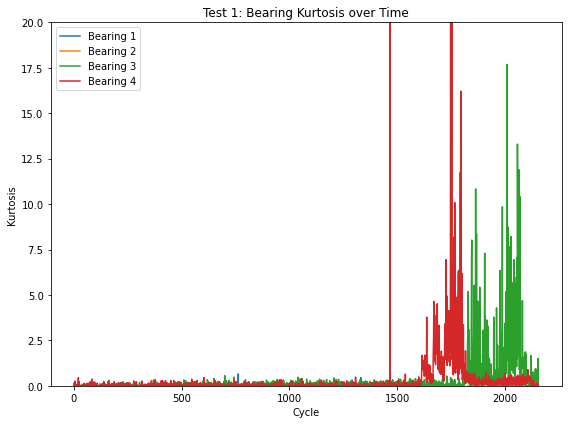

In [19]:
plt.figure(figsize=(8,6))
plt.ylim((0, 20))
plt.plot(kurt['b1'], label='Bearing 1')
plt.plot(kurt['b2'], label='Bearing 2')
plt.plot(kurt['b3'], label='Bearing 3')
plt.plot(kurt['b4'], label='Bearing 4')
plt.ylabel("Kurtosis")
plt.xlabel("Cycle")
plt.title("Test 1: Bearing Kurtosis over Time")
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
#Exponantial Moving Average of Kurtosis
kurt['b1_EMA'] = kurt['b1'].ewm(span=40,adjust=False).mean()
kurt['b2_EMA'] = kurt['b2'].ewm(span=40,adjust=False).mean()
kurt['b3_EMA'] = kurt['b3'].ewm(span=40,adjust=False).mean()
kurt['b4_EMA'] = kurt['b4'].ewm(span=40,adjust=False).mean()

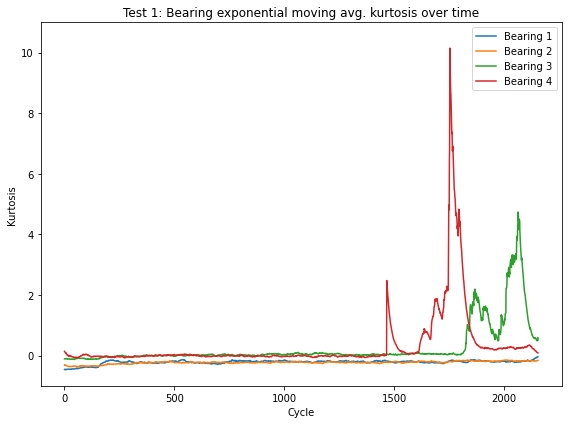

In [21]:
plt.figure(figsize=(8,6))
plt.ylim((-1,11))
plt.plot(kurt['b1_EMA'], label='Bearing 1')
plt.plot(kurt['b2_EMA'], label='Bearing 2')
plt.plot(kurt['b3_EMA'], label='Bearing 3')
plt.plot(kurt['b4_EMA'], label='Bearing 4')
plt.ylabel("Kurtosis")
plt.xlabel("Cycle")
plt.title("Test 1: Bearing exponential moving avg. kurtosis over time")
plt.tight_layout()
plt.legend()
plt.show()

**Source:** https://www.kaggle.com/code/furkancitil/nasa-bearing-dataset-rul-prediction

"Moving average filter (also known as rolling average, running average) is a time series filter which calculates running weighted sum of time series. Simple moving average, cumulative moving average ,and exponantiel moving average methods are applied to feature data for smoothing. After comparing the results on a graph, it is concluded that EMA(40) is best option for filtering because it best reflecting the actual moves of the real data."

In [22]:
ma = pd.DataFrame()

# Simple moving average (SMA)
ma['Kurtosis'] = df[df['bearing']=='ts_b3x']['ktosis']
ma['SMA'] = df[df['bearing']=='ts_b3x']['ktosis'].rolling(window=5).mean()
ma['Cycle'] = kurt.index

#Cumulative Moving Average
ma['CMA'] = df[df['bearing']=='ts_b3x']['ktosis'].expanding(min_periods=10).mean()

#Exponantial Moving Average
ma['EMA'] = df[df['bearing']=='ts_b3x']['ktosis'].ewm(span=40,adjust=False).mean()

<Axes: title={'center': 'Test 1 Bearing 3x Compare Measures of Kurtosis'}, xlabel='Cycle'>

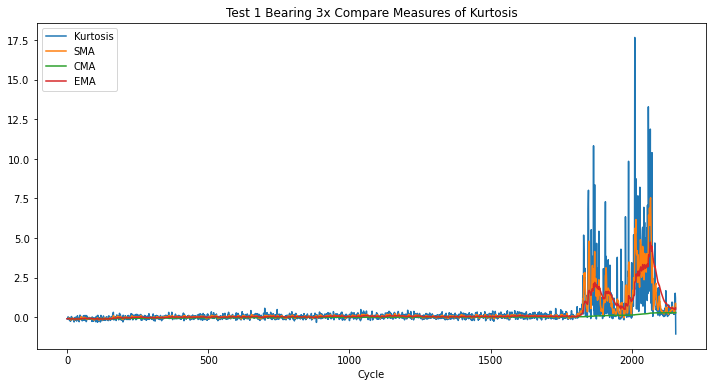

In [23]:
ma.plot(x="Cycle", y= ['Kurtosis','SMA','CMA','EMA'], figsize=(12,6), title="Test 1 Bearing 3x Compare Measures of Kurtosis")

### Spectrogram

In [24]:
rng = np.random.default_rng()

# Take signal from start of series (cycles 200-210 to avoid beginning of series, which appears to have some discontinuity)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b1x'][4096000:4300800], fs=20480) 

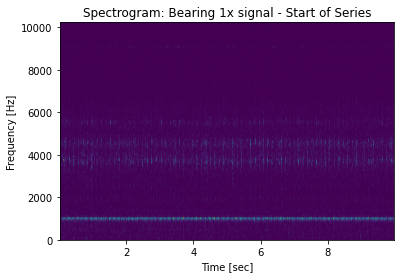

In [25]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 1x signal - Start of Series')
plt.show()

In [26]:
# Take signal from end of series (final 10 cycles)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b1x'][-20480:], fs=20480) 

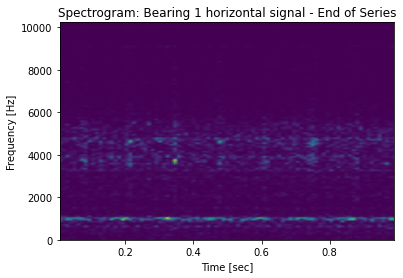

In [27]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 1 horizontal signal - End of Series')
plt.show()

In [28]:
# Take signal from start of series (cycles 200-210 to avoid beginning of series, which appears to have some discontinuity)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b2x'][4096000:4300800], fs=20480) 

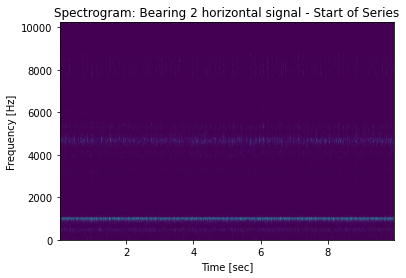

In [29]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 2 horizontal signal - Start of Series')
plt.show()

In [30]:
# Take signal from end of series (final 10 cycles)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b2x'][-20480:], fs=20480) 

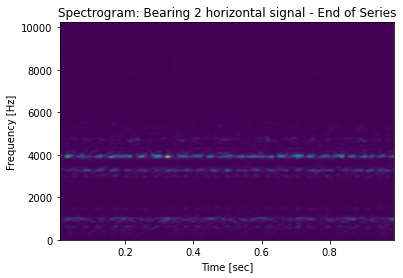

In [31]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 2 horizontal signal - End of Series')
plt.show()

In [32]:
# Take signal from start of series (cycles 200-210 to avoid beginning of series, which appears to have some discontinuity)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b3x'][4096000:4300800], fs=20480) 

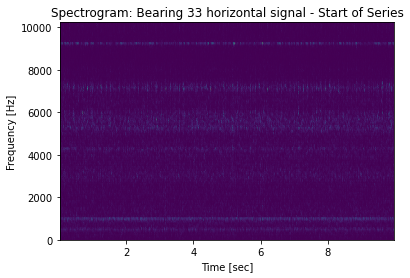

In [33]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 33 horizontal signal - Start of Series')
plt.show()

In [34]:
# Take signal from end of series (final 10 cycles)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b3x'][-20480:], fs=20480) 

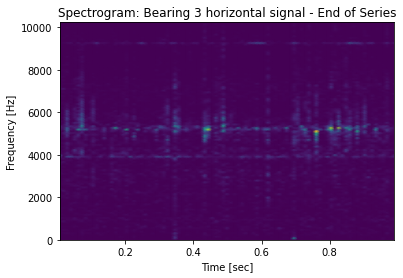

In [35]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 3 horizontal signal - End of Series')
plt.show()

In [36]:
# Take signal from start of series (cycles 200-210 to avoid beginning of series, which appears to have some discontinuity)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b4x'][4096000:4300800], fs=20480) 

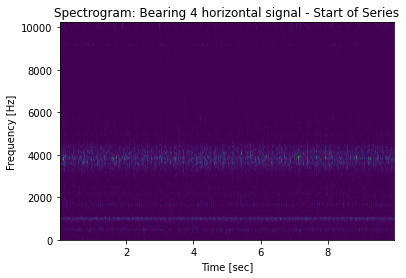

In [37]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 4 horizontal signal - Start of Series')
plt.show()

In [38]:
# Take signal from end of series (final 10 cycles)
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    # Source: https://www.mathworks.com/help/predmaint/ug/condition-monitoring-and-prognostics-using-vibration-signals.html
f, t, Sxx = signal.spectrogram(test_1['b4x'][-20480:], fs=20480) 

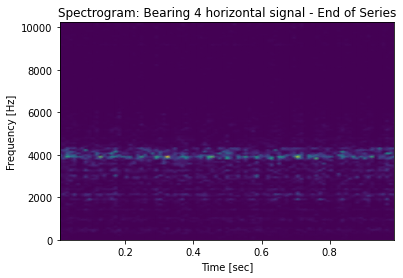

In [39]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram: Bearing 4 horizontal signal - End of Series')
plt.show()